In [ ]:
%pylab inline
import pandas as pd
import seaborn as sns

In [13]:
cd /Users/henrikeckermann/documents/books/extra/Statistical Learning Data

/Users/henrikeckermann/Documents/Books/Extra/Statistical Learning Data


In [15]:
#Import data
data=pd.read_csv("Advertising.csv", index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [16]:
feature_cols= ["TV", "Radio", "Newspaper"]

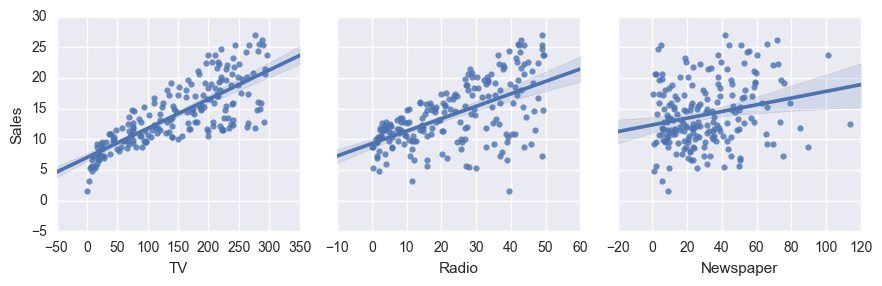

In [18]:
sns.pairplot(data, x_vars=feature_cols, y_vars="Sales", kind="reg",size= 3, aspect=1)

In [32]:
X= data[feature_cols]
y=data["Sales"]
print(X.shape)
print(y.shape)

(200, 3)
(200,)


In [33]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [36]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
_=linreg.fit(X_train, y_train)

In [37]:
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [41]:
coefs= list(zip(feature_cols, linreg.coef_))
coefs

[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111803779)]

--> y= 2.88 + 0.466 x TV + 0.179 x Radio + 0.00345 x Newspaper

In [43]:
y_pred = linreg.predict(X_test)
y_pred

array([ 21.70910292,  16.41055243,   7.60955058,  17.80769552,
        18.6146359 ,  23.83573998,  16.32488681,  13.43225536,
         9.17173403,  17.333853  ,  14.44479482,   9.83511973,
        17.18797614,  16.73086831,  15.05529391,  15.61434433,
        12.42541574,  17.17716376,  11.08827566,  18.00537501,
         9.28438889,  12.98458458,   8.79950614,  10.42382499,
        11.3846456 ,  14.98082512,   9.78853268,  19.39643187,
        18.18099936,  17.12807566,  21.54670213,  14.69809481,
        16.24641438,  12.32114579,  19.92422501,  15.32498602,
        13.88726522,  10.03162255,  20.93105915,   7.44936831,
         3.64695761,   7.22020178,   5.9962782 ,  18.43381853,
         8.39408045,  14.08371047,  15.02195699,  20.35836418,
        20.57036347,  19.60636679])

In [47]:
from sklearn import metrics
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE =np.sqrt(MSE)
print(MSE, RMSE)

1.97304562023 1.40465142303


Now we select 2 out of the 3 features and repeat the procedure:

In [64]:
feature_cols= ["TV", "Radio"]
X=data[feature_cols]
y=data.Sales
X_train, X_test,y_train, y_test = train_test_split(X,y, random_state=1)
linreg.fit(X_train, y_train)
coefs= list(zip(feature_cols, linreg.coef_))
y_pred=linreg.predict(X_test)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE =np.sqrt(MSE)
print("coefficients: ",coefs, "MSE: ", MSE, "RMSE: ", RMSE)

coefficients:  [('TV', 0.046602340710768547), ('Radio', 0.18117959203112896)] MSE:  1.92627604187 RMSE:  1.38790346994
